##Task 1.1 Data Preparation

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn . model_selection import train_test_split
from sklearn.decomposition import PCA


#read dataset
df = pd.read_csv("glass_dataset.csv")
print(df.head(5)) #print first 5 rows to verify
df.info() 
print("\n")

#check for duplicates 
print("Duplicate count : ",df.duplicated().sum(), "\n") #print duplicate count
print(df[df.duplicated(keep=False)], "\n") #print duplicate rows 

df = df.drop_duplicates() #drop duplicates and reassign df
print("Duplicate count : ",df.duplicated().sum(), "\n")

#check for missing values
print(df.isnull().sum())
print("Missing count: ",df.isnull().sum().sum(), "\n")

#separate features from target glass types 
features = df.drop(columns=["Type"])  #glass features
glass = df["Type"]  #glass types

#normalise the dataset
scaler = MinMaxScaler()
scaled = scaler.fit_transform(features)
df_scaled = pd.DataFrame(scaled, columns=features.columns)
df_scaled["Type"] = glass.reset_index(drop=True)

#verify changes 
print("After scaling", df_scaled.max() - df_scaled.min())
print(df_scaled.head(5))

df_scaled.to_csv("glass_dataset_scaled.csv", index=False)


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


Duplicat

##Task 1.2 Classification

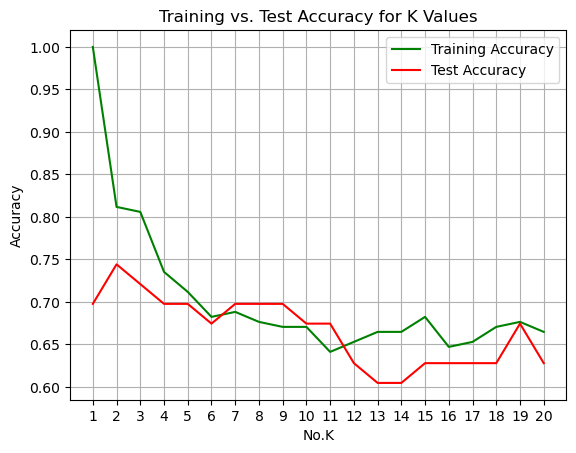

Best scoring K value: 2 with a test accuracy of 0.744

Actual: 7, Predicted: 7
Actual: 5, Predicted: 5
Actual: 2, Predicted: 2
Actual: 5, Predicted: 5
Actual: 1, Predicted: 1


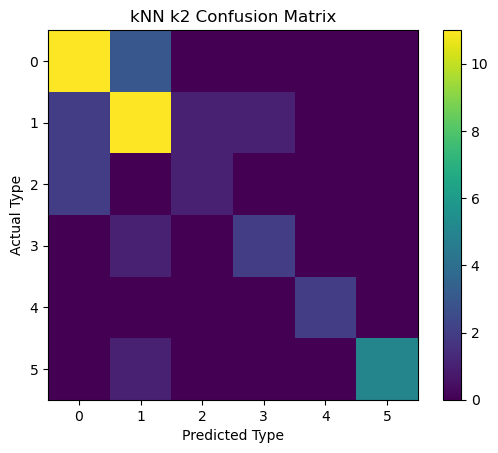

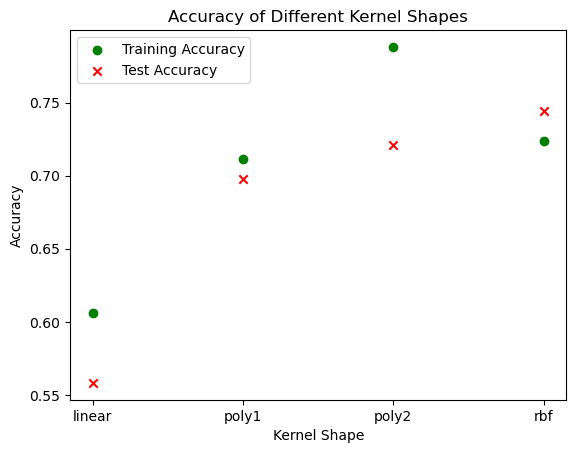

Actual: 7, Predicted: 7
Actual: 5, Predicted: 5
Actual: 2, Predicted: 2
Actual: 5, Predicted: 5
Actual: 1, Predicted: 1


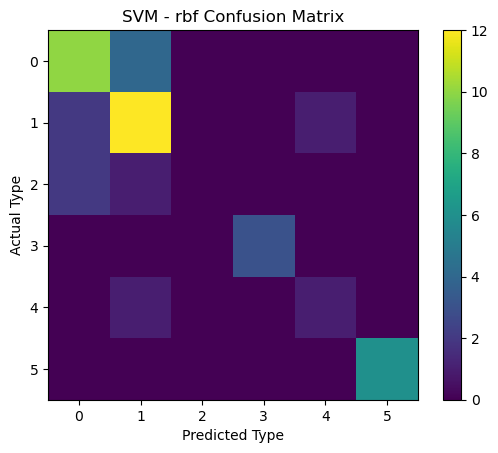

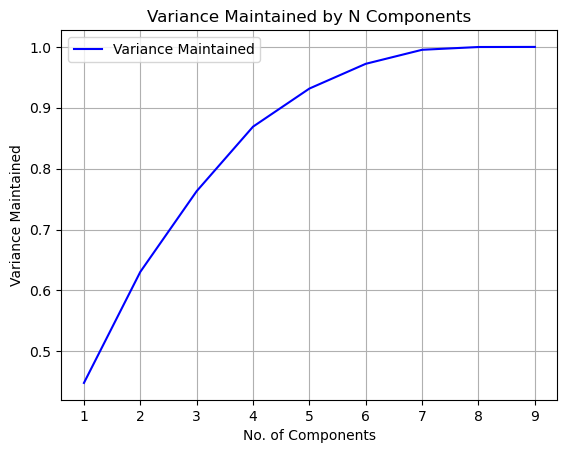

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#separate features from target glass types 
features = df_scaled.drop(columns=["Type"])  #glass features
glass = df_scaled["Type"]  #glass types

#split data
X_train, X_test, y_train, y_test = train_test_split(features, glass, test_size=0.2, stratify=glass, random_state=42)

#compute optimal no. of neighbours (I can talk about how even though k1 seems optimal it's showing signs of overfitting)
k_values = range(1, 21)
k_train_score = []
k_test_score = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_train_score.append(knn.score(X_train, y_train))
    k_test_score.append(knn.score(X_test, y_test))

best_k_test_score = max(k_test_score)
best_k_value = k_values[k_test_score.index(best_k_test_score)]

#plot scores
plt.figure()
plt.xlabel('No.K')
plt.ylabel('Accuracy')
plt.title("Training vs. Test Accuracy for K Values")
plt.plot(k_values, k_train_score, color= 'green', label= "Training Accuracy")
plt.plot(k_values, k_test_score, color ='red', label = "Test Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

print(f"Best scoring K value: {best_k_value} with a test accuracy of {best_k_test_score:.3f}\n")

#predict points with knn model 
knn = KNeighborsClassifier(n_neighbors=best_k_value)  
knn.fit(X_train, y_train)
classifications = knn.predict (X_test)
for i in range(5): 
    print(f"Actual: {y_test.iloc[i]}, Predicted: {classifications[i]}")

knn_confusion = confusion_matrix (y_test, classifications)
plt.imshow(knn_confusion)
plt.colorbar()
plt.xlabel("Predicted Type")
plt.ylabel("Actual Type")
plt.title("kNN k2 Confusion Matrix")
plt.show()


#compute optimal kernel shape
s_train_score = []
s_test_score = []
kernel_shape =['linear', 'poly', 'rbf']
for s in kernel_shape:
    if s == 'poly': #if kernel shape is polynomial then limit search to degree 2,3
         for degree in [2,3]:
             svm = SVC(kernel=s, degree=degree)
             svm.fit(X_train, y_train)
             s_train_score.append(svm.score(X_train, y_train))
             s_test_score.append(svm.score(X_test, y_test))
             #print(f"Shape: {s}, degree {degree}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")
    else:
        svm = SVC(kernel=s)
        svm.fit(X_train, y_train)
        s_train_score.append(svm.score(X_train, y_train))
        s_test_score.append(svm.score(X_test, y_test))
        #print(f"Shape: {s}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")


kernels = ['linear', 'poly1', 'poly2', 'rbf']
plt.figure()
plt.xlabel ("Kernel Shape")
plt.ylabel ("Accuracy")
plt.title("Accuracy of Different Kernel Shapes")
plt.scatter(kernels, s_train_score, color='green', label="Training Accuracy")
plt.scatter(kernels, s_test_score, color='red', label="Test Accuracy", marker= "x")
plt.legend()
plt.show()


#predict points with svm 
svm = SVC (kernel = 'rbf')  
svm.fit(X_train, y_train)
classifications = svm.predict (X_test)
for i in range(5): 
    print(f"Actual: {y_test.iloc[i]}, Predicted: {classifications[i]}")

svm_confusion = confusion_matrix (y_test, classifications)
plt.imshow(svm_confusion)
plt.colorbar()
plt.xlabel("Predicted Type")
plt.ylabel("Actual Type")
plt.title("SVM - rbf Confusion Matrix")
plt.show()


#check for optimal pca components (maintain highest variance / sweet spot)
variance_result = []
pca_values = range(1, 10)  # testing pca from 1 - 9 dimensions

k_pca_train_score = []
k_pca_test_score = []

s_pca_train_score = []
s_pca_test_score = []

for p in pca_values:
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    variance_result.append(sum(pca.explained_variance_ratio_))
    #print("No. of Components: ",p, " Variance: ", variance_result[p-1]) 

#plot scores
plt.figure()
plt.xlabel('No. of Components')
plt.ylabel('Variance Maintained')
plt.title("Variance Maintained by N Components")
plt.plot(pca_values, variance_result, color= 'blue', label= "Variance Maintained")
plt.xticks(pca_values)
plt.grid(True)
plt.legend()
plt.show()


#POTENTIAL FUN EXTENSION TASK BELOW
#--------------------------------
#accuracy of k_values with pca_values as a heat map (??)
#accuracy of kernel shapes with pca_values as a heat map (??)
#compare new pca knn with new pca svm and examine potential improvements 

#compare accuracies of different k values and kernel shapes with pca components n 
for p in pca_values:
    pca = PCA(n_components=p)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    variance_result.append(sum(pca.explained_variance_ratio_))

    #check for optimal k values in conjunction with pca
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_pca, y_train)
        k_pca_train_score.append(knn.score(X_train_pca, y_train))
        k_pca_test_score.append(knn.score(X_test_pca, y_test))
        #print(f"No. of Components: {p}, No. Neighbours: {k}, Train Accuracy: {k_pca_train_score[-1]:.4f}, Test Accuracy: {k_pca_test_score[-1]:.4f}")

        #check for optimal kernel shape in conjunction with pca
        for s in kernel_shape:
            svm = SVC(kernel=s)
            if s == 'poly':  # if kernel shape is polynomial then limit search
                for degree in [2, 3]:
                    svm.fit(X_train_pca, y_train)
                    s_train_score.append(svm.score(X_train_pca, y_train))
                    s_test_score.append(svm.score(X_test_pca, y_test))
                    #print(f"No. of Components: {p}, Shape: {s}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")
            else:
                svm.fit(X_train_pca, y_train)
                s_train_score.append(svm.score(X_train_pca, y_train))
                s_test_score.append(svm.score(X_test_pca, y_test))
                #print(f"No. of Components: {p}, Shape: {s}, Train Accuracy: {s_train_score[-1]:.4f}, Test Accuracy: {s_test_score[-1]:.4f}")



Task 1.3 Assessment of classification

After identifying the best model parameters in the previous task, the classification models you
have implemented must be assessed. To do this you are required to assess the accuracy for each
model. You may use the accuracy implementation available to do this. It is not sufficient to report a
single accuracy score. You must use cross-validation to report training results and report these
values using a plot. You will also need to write a summary analysing your results and findings.


#assess accuracy for each model (best params) from 1.2 
#must use cross validation and plot results along with summary of findings 